- Regularization is the American English spelling.
- Regularisation is the British English spelling

In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

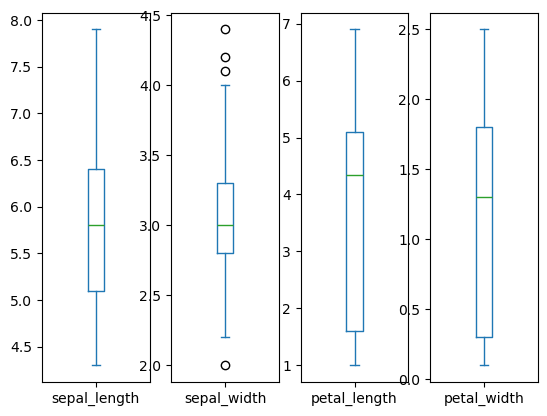

In [7]:
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].plot(kind="box",subplots=True)
plt.show()

In [8]:
data.species.value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data.shape

(150, 5)

In [11]:
x,xt,y,yt=train_test_split(data.drop(columns="species"),
                                    data.species,
                                    stratify=data.species,
                          test_size=.1,
                          random_state=42)

# Bagging

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf=RandomForestClassifier() #n_estimators=100 - 100 DT 

In [14]:
rf.fit(x,y)

RandomForestClassifier()

By SCORE

In [15]:
rf.score(xt,yt)

0.9333333333333333

In [16]:
rf.score(x,y)   # to look for overfit-- RANDOM FOREST IS ALMOST IMMUNE TO OVERFIT 

1.0

By Prediction -- You can use any one way!

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
yt_hat=rf.predict(xt)

In [19]:
accuracy_score(yt,yt_hat)

0.9333333333333333

FEATURE IMPORTANCE

In [20]:
rf.feature_importances_

array([0.08964901, 0.02629905, 0.41382422, 0.47022772])

<Axes: >

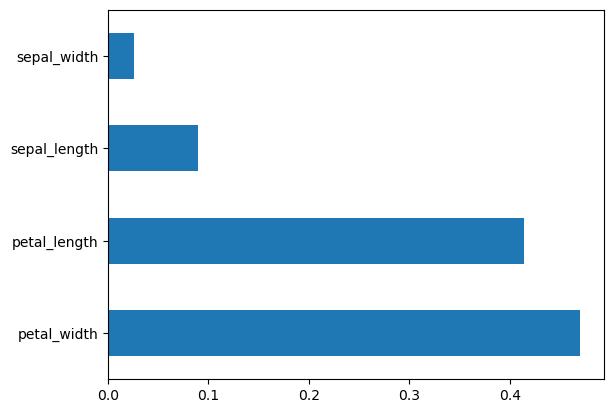

In [21]:
pd.Series(rf.feature_importances_,index=x.columns).nlargest(10).plot(kind="barh")

### Voting Classifier

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [23]:
dt=DecisionTreeClassifier()
nb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
lr= LogisticRegression(max_iter=1000)

In [24]:
model=[("Decision Tree",dt),("Naive_bayes",nb),("Logistic Regression",lr),("K_Neighbors",knn),("Support_Vector",svc)]

In [25]:
vc=VotingClassifier(model)

In [26]:
vc.fit(x,y)

VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                             ('Naive_bayes', GaussianNB()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000)),
                             ('K_Neighbors', KNeighborsClassifier()),
                             ('Support_Vector', SVC())])

In [27]:
vc.score(xt,yt)

0.9333333333333333

In [28]:
vc.estimators_

[DecisionTreeClassifier(),
 GaussianNB(),
 LogisticRegression(max_iter=1000),
 KNeighborsClassifier(),
 SVC()]

*Next Section*
# BOOSTING

In [29]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [30]:
ada=AdaBoostClassifier()

In [31]:
ada.fit(x,y)

i:\Software\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [32]:
ada.score(xt,yt)

0.8666666666666667

In [33]:
#GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [34]:
gb.fit(x,y)

GradientBoostingClassifier()

In [35]:
gb.score(xt,yt)

0.9333333333333333

$XG-BOOST$
*Framework-3rd party Lib*
- Means we have install it , so if you see *"No module named 'xgboost'"* please use below code
    - pip install xgboost
  

In [36]:
#! pip install xgboost
# !pip install --upgrade scikit-learn

##### XGBOOST
1. Distributed System
2. Out of box computation
3. It handels the null values for you
4. Its uses parallel approch combines

In [37]:
from xgboost import XGBClassifier

In [38]:
xgb=XGBClassifier()

In [39]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
y_num=y.replace({'setosa':0, 'versicolor':1, 'virginica':2})

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_22504\2599769108.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_num=y.replace({'setosa':0, 'versicolor':1, 'virginica':2})


In [41]:
xgb.fit(x,y_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
yt_num=yt.replace({'setosa':0, 'versicolor':1, 'virginica':2})

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_22504\2887744762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yt_num=yt.replace({'setosa':0, 'versicolor':1, 'virginica':2})


In [43]:
xgb.score(xt,yt_num)

0.9333333333333333